# 3.1 All-Ones or All-Zeros Tensors
Tensors need some initial values - below we create all ones tensor.

In [3]:
import tensorflow as tf

x = tf.ones(shape=(2, 1))
print(x)


x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


# 3.2 Random Tensors
We can also create initial tensors of random values defined by a distribution.

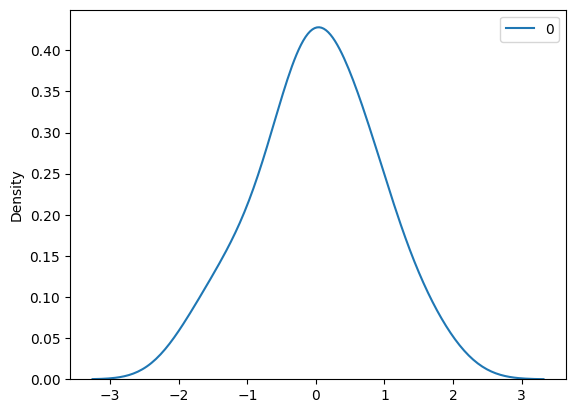

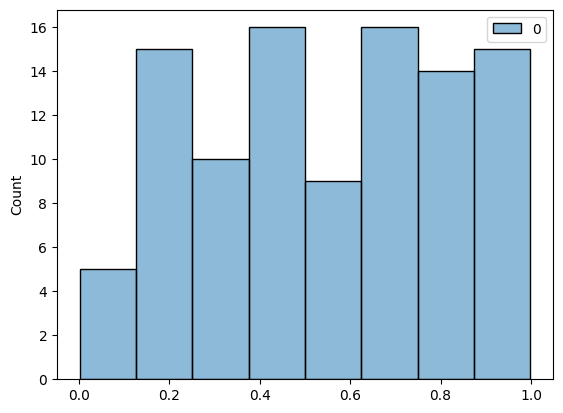

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


x = tf.random.normal(shape=(100, 1), mean=0.0, stddev=1.0)
sns.kdeplot(x, bw_method=0.5)
plt.show()


x = tf.random.uniform(shape=(100, 1), minval=0.0, maxval=1.0)
sns.histplot(x)
plt.show()

# 3.3 & 3.4 Numpy arrays are assignable but TensorFlow arrays are not.

# 3.5 Creating a TensorFlow Variable

In [33]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)


# we can modify variables via the assign method
v.assign(tf.ones((3, 1)))
print(v)


# we can do this for subsets. Commenting out because we are getting errors from hardware
# v[0, 0].assign(3.)
# print(v)


# we can perform operations on variables as well
v.assign_add(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.3544159 ],
       [ 0.7045493 ],
       [ 0.03666191]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>


# 3.10 Using GradientTape API

In [37]:
input_var = tf.Variable(initial_value=3.0)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


# 3.12 We can measure the gradient of a falling apple (should be 9.81)

In [41]:
time = tf.Variable(0.0)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 1 / 2 * 9.81 * time**2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)

tf.Tensor(9.81, shape=(), dtype=float32)


# 3.5.4 End-to-End Linear Classifier in Pure Tensorflow
## Data Generation

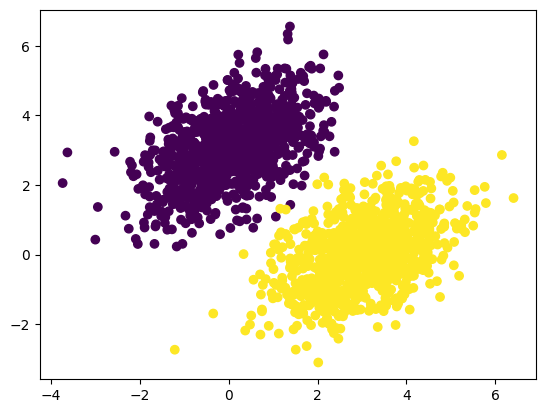

In [47]:
import numpy as np

# 3.13 Generating two classes of random points in 2d plane
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class
)

# 3.14 Stack Samples
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# 3.15 Generating Targets (0 and 1)
targets = np.vstack(
    (
        np.zeros((num_samples_per_class, 1), dtype="float32"),
        np.ones((num_samples_per_class, 1), dtype="float32"),
    )
)

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

## Modeling Using Pure tf

Loss at step 0: 4.2529
Loss at step 1: 0.5292
Loss at step 2: 0.1805
Loss at step 3: 0.1205
Loss at step 4: 0.1057
Loss at step 5: 0.0982
Loss at step 6: 0.0922
Loss at step 7: 0.0869
Loss at step 8: 0.0820
Loss at step 9: 0.0775
Loss at step 10: 0.0734
Loss at step 11: 0.0696
Loss at step 12: 0.0660
Loss at step 13: 0.0628
Loss at step 14: 0.0598
Loss at step 15: 0.0571
Loss at step 16: 0.0545
Loss at step 17: 0.0522
Loss at step 18: 0.0500
Loss at step 19: 0.0481
Loss at step 20: 0.0462
Loss at step 21: 0.0446
Loss at step 22: 0.0430
Loss at step 23: 0.0416
Loss at step 24: 0.0403
Loss at step 25: 0.0391
Loss at step 26: 0.0379
Loss at step 27: 0.0369
Loss at step 28: 0.0360
Loss at step 29: 0.0351
Loss at step 30: 0.0343
Loss at step 31: 0.0336
Loss at step 32: 0.0329
Loss at step 33: 0.0322
Loss at step 34: 0.0317
Loss at step 35: 0.0311
Loss at step 36: 0.0306
Loss at step 37: 0.0302
Loss at step 38: 0.0298
Loss at step 39: 0.0294


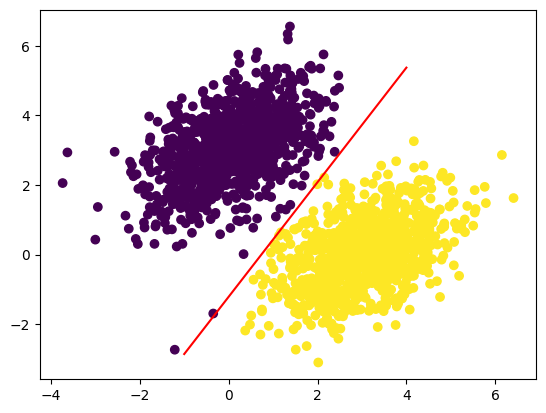

In [52]:
# Create linear classifier vars
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


# Prediction formula
def model(inputs):
    return tf.matmul(inputs, W) + b


# Square loss
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)


# Training step function
learning_rate = 0.1


def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss


for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

predictions = model(inputs)

x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()